## Objective

Evaluation of wave length

In [10]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [8]:
src_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/'
save_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-04-07/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-04-07/


In [5]:
df = pd.DataFrame( {
    'setting' : ['original', '(1)', '(2)', '(3)'] ,
    'session_id' : ['20190407-2','20190407-3','20190407-4','20190407-5'],
    'case_id' : ['Mahajan', 'A', 'B', 'C, D'],
    'simu_id' : [None, '20190226-3', '20180616-1', '20180625-1']
    
})
df

,case_id,session_id,setting,simu_id
0,Mahajan,20190407-2,original,None
1,A,20190407-3,(1),20190226-3
2,B,20190407-4,(2),20180616-1
3,"C, D",20190407-5,(3),20180625-1


In [6]:
def calc_apd(vmem, r_thre=0.9):
    vmem_thre = (1-r_thre)*vmem.max() + r_thre*vmem.min()
    flag_on = False
    apd = None
    for f, v in enumerate(vmem):
        if not flag_on:
            if v > vmem_thre:
                flag_on = True
                f_start = f
        else:
            if v < vmem_thre:
                apd = f - f_start
                break
    return vmem_thre, f_start, apd 

In [15]:
(y1, x1) = (100, 50)
(y2, x2) = (100, 150)

32 0.46875
35 0.428571428571
34 0.441176470588
29 0.51724137931


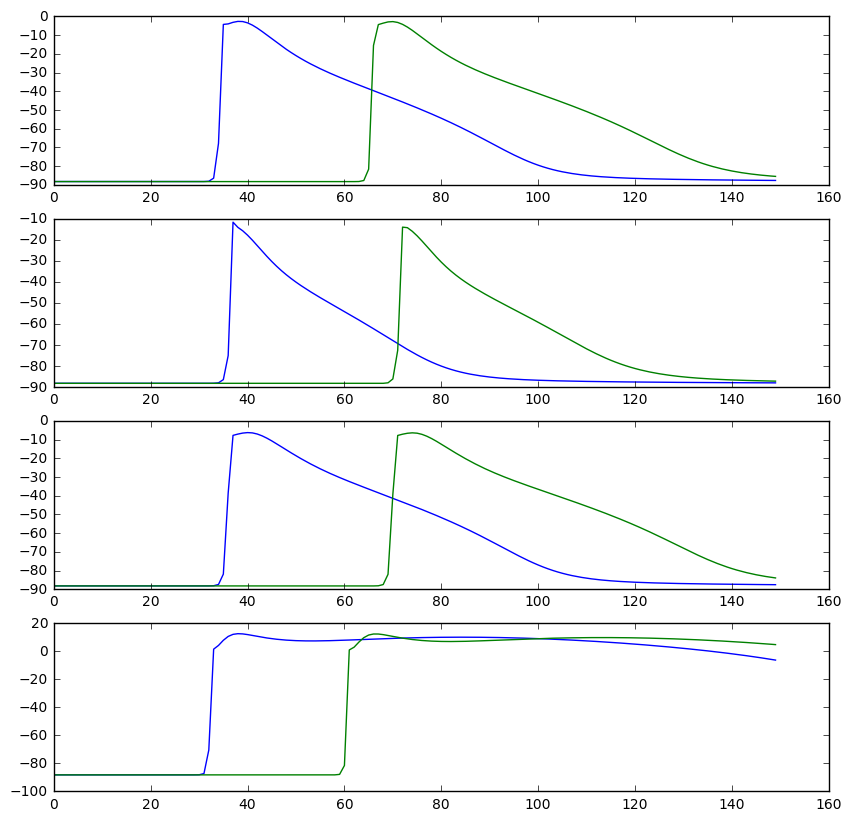

In [31]:
linestyles = ['solid', 'dotted', 'dashed', 'solid']
plt.subplots_adjust(hspace=0.6)
plt.figure(figsize=(10,10))

for i, row in df.iterrows():
    
    vmem_p1 = np.array( [ np.load('{0}/{1}/vmem_{2:0>4}.npy'.format(src_dir, row['session_id'], f))[y1, x1] for f in range(150)] )
    vmem_p2 = np.array( [ np.load('{0}/{1}/vmem_{2:0>4}.npy'.format(src_dir, row['session_id'], f))[y2, x2] for f in range(150)] )
    
    _, f_start_1, _ = calc_apd(vmem_p1)
    _, f_start_2, _ = calc_apd(vmem_p2)
    travel_time = f_start_2-f_start_1
    cv  = 0.15 * 100 / travel_time # mm/ms 
    print travel_time, cv
    
    plt.subplot(4,1,i+1)
    plt.plot(vmem_p1)
    plt.plot(vmem_p2)
        

 ### Wavelength (apd from 2019-03-31.ipynb)

In [36]:
print 'original', 110*(0.15 * 100 / 32)

print '(1)', 64*(0.15 * 100 / 35)

print '(2)', 112*(0.15 * 100 / 34)

print '(3)', 207*(0.15 * 100 / 29)


original 51.5625
(1) 27.4285714286
(2) 49.4117647059
(3) 107.068965517


In [39]:


from simulation/elecpy/cell/mahajan/const import *

SyntaxError: invalid syntax (<ipython-input-39-0083ed9cec03>, line 1)

In [47]:
from math import exp, sqrt

const_d = {

  # Initial values of variables
  'v_'           : -87.169816169406  , # Membrane voltage
  'temp_'        : 308               , # Temperature (K)
  'dt_'          : 0.001             , # Time step (ms)
  'm_'           : 0.001075453357    , # Na activation
  'h_'           : 0.990691306716    , # Na inactivation
  'j_'           : 0.993888937283    , # Na inactivation
  'dyad_'        : 1.716573130685    , #
  'c1_'          : 0.000018211252    , #
  'c2_'          : 0.979322592773    , #
  'xi1ca_'       : 0.001208153482    , #
  'xi1ba_'       : 0.000033616596    , #
  'xi2ca_'       : 0.004173008466    , #
  'xi2ba_'       : 0.015242594688    , #
  'xr_'          : 0.007074239331    , # Rapidly Activating K time-dependant activation
  'cai_'         : 0.256752008084    , # Intracellular Ca (mM)
  'xs1_'         : 0.048267587131    , # Slowly Activating K time-dependant activation
  'xs2_'         : 0.105468807033    , # Slowly Activating K time-dependant activation
  'xtos_'        : 0.00364776906     , #
  'xtof_'        : 0.003643592594    , #
  'ytos_'        : 0.174403618112    , #
  'ytof_'        : 0.993331326442    , #
  'nai_'         : 11.441712311614   , # Intracellular Na (mM)
  'submem_'      : 0.226941113355    , #
  'nsr_'         : 104.450004990523  , #
  'jsr_'         : 97.505463697266   , #
  'kj_'          : 50.0              , #
  'xir_'         : 0.006679257264    , #
  'tropi_'       : 22.171689894953   , #
  'trops_'       : 19.864701949854   , #
  'it_'          : 0.0               , # total ion current
  'st_'          : 0.0               , # Stimulus current (uA/cm^2)
  'xina_'        : 0.0               , #
  'xik1_'        : 0.0               , #
  'xikr_'        : 0.0               , #
  'xiks_'        : 0.0               , #
  'xito_'        : 0.0               , #
  'xitof_'       : 0.0               , #
  'xitos_'       : 0.0               , #
  'xiNaCa_'      : 0.0               , #
  'xica_'        : 0.0               , #
  'xiNaK_'       : 0.0               , #

  # Initial values of constants
  'vth_'         : 0.0               , #
  's1t_'         : 0.00195           , #
  's2t_'         : 0.00105763        , #
  's6_'          : 8.0               , #
  'taupo_'       : 1.0               , #
  'taua_'        : 100.0             , #
  'cao_'         : 1.8               , #
  'cat_'         : 3.0               , #
  'tca_'         : 78.0329           , #
  'cpt_'         : 6.09365           , #
  'vy_'          : 40.0              , #
  'sy_'          : 4.0               , #
  'vx_'          : 40.0              , #
  'sx_'          : 3.0               , #
  'vyr_'         : 40.0              , #
  'syr_'         : 11.32             , #
  'tau3_'        : 3.0               , #
  'k2_'          : 1.03615e-4        , #
  'r1_'          : 0.3               , #
  'r2_'          : 3.0               , #
  'k1t_'         : 0.00413           , #
  'k2t_'         : 0.00224           , #
  'vup_'         : 0.4               , #
  'cup_'         : 0.5               , #
  'gleak_'       : 0.00002069        , #
  'ki_'          : 140.0             , #
  'bcal_'        : 24.0              , #
  'xkcal_'       : 7.0               , #
  'srmax_'       : 47.0              , #
  'srkd_'        : 0.6               , #
  'bmem_'        : 15.0              , #
  'kmem_'        : 0.3               , #
  'bsar_'        : 42.0              , #
  'ksar_'        : 13.0              , #
  'xkon_'        : 0.0327            , #
  'btrop_'       : 70.0              , #
  'xkoff_'       : 0.0196            , #
  'taud_'        : 4.0               , #
  'cstar_'       : 90.0              , #
  'av_'          : 11.3              , #
  'bv_'          : 977.0             , #
  'pca_'         : 0.00054           , #
  'F_'           : 96.4853415        , #
  'R_'           : 8.314472          , #
  'ax_'          : 0.3576            , #
  'ay_'          : 0.05              , #
  'gryr_'        : 2.58079           , #
  'taur_'        : 30.0              , #
  'gbarsr_'      : 26841.8           , #
  'gdyad_'       : 9000.0            , #
  'taups_'       : 0.5               , #
  'gca_'         : 182.0             , #
  'xkdna_'       : 0.3               , #
  'nao_'         : 136.0             , #
  'xmcao_'       : 1.3               , #
  'xmnao_'       : 87.5              , #
  'xmnai_'       : 12.3              , #
  'xmcai_'       : 0.0036            , #
  'gNaCa_'       : 0.84              , #
  'sigma_'       : 0.934910849       , #
  'gNaK_'        : 1.5               , #
  'gna_'         : 12.0              , #
  'xkmnai_'      : 12.0              , #
  'ko_'          : 5.4               , #
  'xkmko_'       : 1.5               , #
  'wca_'         : 8.0               , #
  'gkix_'        : 0.3               , #
  'gtos_'        : 0.04              , #
  'gtof_'        : 0.11              , #
  'gkr_'         : 0.0125            , #
  'prNaK_'       : 0.01833           , #
  'ki_'          : 140.0             , #
  'gks_'         : 0.1386            , #

  # Q10 for conductance of ion currents
  'Q10NA_'   : 1.5,
  'Q10CAL_'  : 2.96,
  'Q10CAT_'  : 2.5,
  'Q10KR_'   : 1.94,
  'Q10KS_'   : 2.2,
  'Q10K1_'   : 1.5,
  'Q10TO_'   : 6.14,
  'Q10NACA_' : 2.2,
  'Q10NAK_'  : 1.87,
  'Q10REL_'  : 1.68,

  # Shift in steady-state (in)activation curves [mV/K]
  'SINFM_' : 0.8,
  'SINFHJ_' : 0.7,
  'SINFXR_' : -1.16,

  # Q10 for time constant of (in)activation
  'Q10TAUMHJ_' : 2.79,
  'Q10TAUD_' : 2.52,
  'Q10TAUF_' : 2.82,
  'Q10TAUBG_' : 2.5,
  'Q10TAUXR_' : 6.25,
  'Q10TAUXS_' : 2.58,
  'Q10OTHER_' : 2.50,
}


In [52]:
const_d["gca_"]*1.9, const_d["gca_"]*1.4,  const_d["gca_"]*1.0

(345.8, 254.79999999999998, 182.0)

In [56]:
const_d["gtos_"]*1.9, const_d["gtos_"]*1.4,  const_d["gtos_"]*1.0

(0.076, 0.055999999999999994, 0.04)

In [57]:
const_d["gtof_"]*1.9, const_d["gtof_"]*1.4,  const_d["gtof_"]*1.0

(0.209, 0.154, 0.11)